# Imports

In [2]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

## Get Data

In [3]:
def fetch_hourly_data(ticker, start_date, end_date):
    data = yf.download(ticker, start=start_date, end=end_date, interval="1h")
    return data

## Create Function for Market Profile

In [4]:
def create_market_profile(data):
    # Calculate the volume at each price level
    profile = data.groupby('Close')['Volume'].sum().reset_index()

    # Identify the Value Area (70% of the volume)
    total_volume = profile['Volume'].sum()
    profile['volume_cumsum'] = profile['Volume'].cumsum()

    # Value Area range
    value_area_cutoff = total_volume * 0.70
    value_area_df = profile[profile['volume_cumsum'] <= value_area_cutoff]

    # Point of Control (POC): The price with the highest volume
    POC = profile.loc[profile['Volume'].idxmax(), 'Close']

    return profile, value_area_df, POC

## Plot Market Profile

In [5]:
def plot_market_profile(profile, value_area_df, POC, ticker):
    plt.figure(figsize=(10, 6))
    plt.barh(profile['Close'], profile['Volume'], color='blue', edgecolor='black')

    # Highlighting the Value Area
    plt.barh(value_area_df['Close'], value_area_df['Volume'], color='green', edgecolor='black')

    # Highlighting the Point of Control (POC)
    plt.axhline(POC, color='red', linestyle='--', label=f'POC: {POC}')

    plt.xlabel('Volume')
    plt.ylabel('Price')
    plt.title(f'Market Profile for {ticker}')
    plt.legend()
    plt.show()

## Main function to fetch data, create Market Profile, and plot it

[*********************100%%**********************]  1 of 1 completed


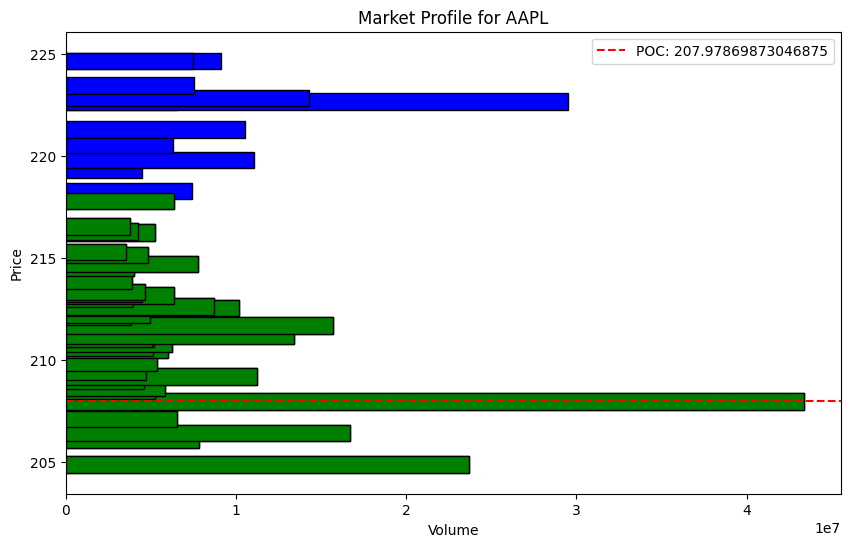

In [9]:
def main():
    ticker = 'AAPL'  # Example: Apple Inc.
    start_date = "2024-08-01"
    end_date = "2024-08-10"

    # Fetch hourly data
    data = fetch_hourly_data(ticker, start_date, end_date)

    # Create Market Profile
    profile, value_area_df, POC = create_market_profile(data)

    # Plot Market Profile
    plot_market_profile(profile, value_area_df, POC, ticker)

if __name__ == "__main__":
    main()